In [1]:
import drawing
import os
import tempfile
import boto3

In [2]:
tmp = tempfile.mkdtemp(); tmp

'/tmp/tmpr3u4c65e'

In [8]:
imagename = 'test1.png'
in_bucket_name = 'color-bot-source-1'
out_bucket_name = 'color-bot-dest-1'
table_name = 'ColorBot'

In [4]:
s3 = boto3.resource('s3')

In [15]:
s3.Bucket(in_bucket_name).download_file(imagename, os.path.join(tmp, imagename))

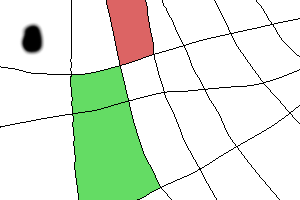

In [18]:
colored = drawing.build_colored_drawing(tmp, imagename, table_name); colored

In [10]:
save_path = os.path.join(tmp, 'out-' + imagename)

colored.save(save_path)

In [13]:
s3.Bucket(out_bucket_name).upload_file(save_path, imagename)

In [ ]:
def get_image(imagename, in_bucket_name, out_bucket_name, table_name):
    tmp = tempfile.mkdtemp()
    save_path = os.path.join(tmp, 'out-' + imagename)
    
    s3 = boto3.resource('s3')
    
    # Now we have i.e. test1.png in tmp/test1.png
    s3.Bucket(in_bucket_name).download_file(imagename, os.path.join(tmp, imagename))
    
    # Colored is a PIL image that is the colored version of 
    colored = drawing.build_colored_drawing(tmp, imagename, table_name)

    colored.save(save_path)
    s3.Bucket(out_bucket_name).upload_file(save_path, imagename)

In [2]:
drawing.get_image_name('ColorBot')

'test1.png'